In [199]:
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

First we need to define the mesh

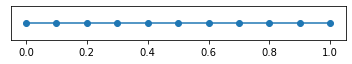

In [229]:
mesh = IntervalMesh(10, 0, 1)
dx = Measure('dx', domain = mesh)
plot(mesh)

 Function Space and Test Functions can be defined

In [230]:
V = FunctionSpace(mesh, 'CG', 1)

p = TrialFunction(V)

v = TestFunction(V)

In [231]:
f = Expression("pow(x[0],2)", degree = 2)


[0.   0.01 0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81 1.  ]


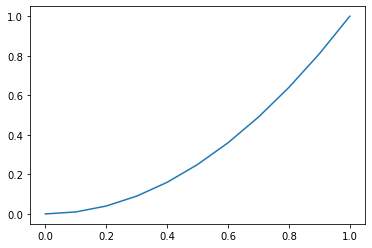

In [232]:
g = interpolate(f, V)
print(g.compute_vertex_values())
plot(g)

1.0
[0.         0.0222987  0.0891948  0.20068831 0.35677922 0.55746753
 0.80275324 1.09263636 1.42711688 1.8061948  2.22987012]


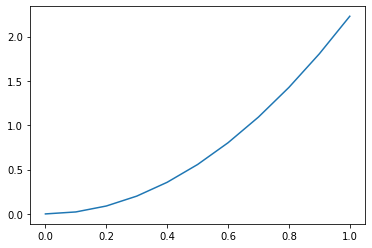

In [241]:
norm = np.sqrt(assemble(g*g*dx))
print(norm)
g.vector()[:] = g.vector()[:]/norm
print(g.compute_vertex_values())
plot(g)

In [243]:
g.geometric_dimension()

1

SCIPY INTEGRATION

In [226]:
result = integrate.quad(lambda x: x/2 - np.sin(2*x)/4, 0, 2*np.pi)
np.sqrt(result)

array([3.14159265e+00, 3.31020574e-07])

In [239]:
g_array = g.compute_vertex_values()
print(g_array)
summ = 0
for i in g_array:
        summ += i**2 
np.sqrt(summ)

[0.         0.0222987  0.0891948  0.20068831 0.35677922 0.55746753
 0.80275324 1.09263636 1.42711688 1.8061948  2.22987012]


3.549137944698061

In [211]:
x = np.linspace(0, 2 * np.pi, 11)
y = np.sin(x)
y

array([ 0.00000000e+00,  5.87785252e-01,  9.51056516e-01,  9.51056516e-01,
        5.87785252e-01,  1.22464680e-16, -5.87785252e-01, -9.51056516e-01,
       -9.51056516e-01, -5.87785252e-01, -2.44929360e-16])

In [214]:
summ = 0
for i in y:
        summ += i**2 
        print(summ)
y_norm = np.sqrt(summ)
print(y_norm)
y = y/y_norm
y

0.0
0.06909830056250525
0.24999999999999994
0.4309016994374947
0.49999999999999994
0.49999999999999994
0.5690983005625052
0.7499999999999999
0.9309016994374947
1.0
1.0
1.0


array([ 0.00000000e+00,  2.62865556e-01,  4.25325404e-01,  4.25325404e-01,
        2.62865556e-01,  5.47678698e-17, -2.62865556e-01, -4.25325404e-01,
       -4.25325404e-01, -2.62865556e-01, -1.09535740e-16])

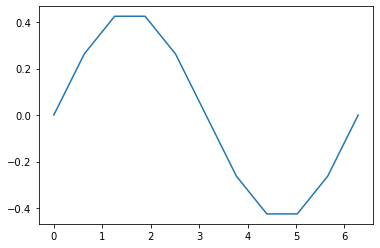

In [209]:
plt.plot(x,y)